分类模型试图在一个离散的空间中预测一个目标，即为一个因变量实例分配一个或多个类别。分类分数可视化工具显示类之间的差异以及一些特定于分类器的可视化评估。我们目前已经实施了以下分类器评估：

+ 分类报告Classification Report：视觉分类报告，将每个类别的精度，召回率和F1显示为热图。
+ 混淆矩阵Confusion Matrix：多类分类中混淆矩阵的热图视图。
+ ROCAUC: 绘制训练器的工作特性和曲线下面积
+ Precision-Recall曲线：绘制不同概率阈值的精度和召回率。
+ 类平衡：目视检查目标，以向最终评估者显示每个类的支持。
+ 类预测错误：混淆矩阵的另一种选择，它显示实际类和预测类之间的支持和差异。
+ 辨别阈值：显示使用辨别概率或分数的二进制分类器在所有阈值上的精确度、召回率、F1和队列率。

本文如果数据集下载不下来，查看下面地址，然后放入yellowbrick安装目录\datasets\fixtures文件夹:
```
{
  "bikeshare": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/bikeshare.zip",
    "signature": "4ed07a929ccbe0171309129e6adda1c4390190385dd6001ba9eecc795a21eef2"
  },
  "hobbies": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip",
    "signature": "6114e32f46baddf049a18fb05bad3efa98f4e6a0fe87066c94071541cb1e906f"
  },
  "concrete": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/concrete.zip",
    "signature": "5807af2f04e14e407f61e66a4f3daf910361a99bb5052809096b47d3cccdfc0a"
  },
  "credit": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/credit.zip",
    "signature": "2c6f5821c4039d70e901cc079d1404f6f49c3d6815871231c40348a69ae26573"
  },
  "energy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/energy.zip",
    "signature": "174eca3cd81e888fc416c006de77dbe5f89d643b20319902a0362e2f1972a34e"
  },
  "game": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/game.zip",
    "signature": "ce799d1c55fcf1985a02def4d85672ac86c022f8f7afefbe42b20364fba47d7a"
  },
  "mushroom": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/mushroom.zip",
    "signature": "f79fdbc33b012dabd06a8f3cb3007d244b6aab22d41358b9aeda74417c91f300"
  },
  "occupancy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/occupancy.zip",
    "signature": "0b390387584586a05f45c7da610fdaaf8922c5954834f323ae349137394e6253"
  },
  "spam": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/spam.zip",
    "signature": "000309ac2b61090a3001de3e262a5f5319708bb42791c62d15a08a2f9f7cb30a"
  },
  "walking": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/walking.zip",
    "signature": "7a36615978bc3bb74a2e9d5de216815621bd37f6a42c65d3fc28b242b4d6e040"
  },
  "nfl": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/nfl.zip",
    "signature": "4989c66818ea18217ee0fe3a59932b963bd65869928c14075a5c50366cb81e1f"
  }
}
```

In [1]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 分类报告Classification Report
分类报告可视化工具显示模型的精度、召回率、F1和支持度得分。为了便于解释和发现问题，该报告将数字分数与彩色编码热图相结合。所有热图都在（0.0，1.0）范围内，以便于不同分类报告之间的分类模型比较。

|可视化器|ClassificationReport|
|-|-|
|快速使用方法|classification_report()|
|模型|分类|
|工作流程|模型评估|


## 1.1 基本使用

In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
# 建立时序数据
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
# 建立分类器
model = GaussianNB()
# support 表示是否添加support方块格中显示数据。{True，False，None，'percent'，'count'}，默认值：无
# support-'percent'表示百分比显示数据，'count'表示按个数显示数据
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:752: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


<Figure size 800x550 with 2 Axes>

分类报告以每个类为基础显示主要分类指标的表示形式。
这给了分类器行为比全局精度更深的直观，这可以掩盖多类问题的一类中的功能弱点。
视觉分类报告用于比较分类模型，以选择更“红色”的模型，例如，具有更强的分类度量或更平衡的模型。

度量标准根据真阳性和假阳性，真阴性和假阴性来定义。在这种情况下，正和负是二元分类问题的类的通用名称。在上面的例子中，我们会考虑真和假被占据和真和假未被占据。因此，真正的正数是当实际类和估计类都是正数时。假阳性是指实际的类是负数，但估计的类是正数。使用这个术语，计量的定义如下:
+ 精度precision：精确度是分类器不将一个实例标记为正的能力，而实际上是负的。对于每个类，它被定义为真阳性与真阳性和假阳性之和的比率。换句话说，“对于所有被归类为正面的例子，正确的百分比是多少?”
+ 召回率recall：回忆是分类器找到所有正实例的能力。对于每个类，它被定义为真阳性与真阳性和假阴性之和的比率。换一种说法，“在所有实际是积极的情况下，正确分类的百分比是多少?”
+ F1分数：F1的分数是精度和召回率的加权调和平均值，最好的分数是1.0，最差的是0.0。一般来说，F1的分数低于准确性指标，因为它们在计算中嵌入了精度和召回率。作为一个经验法则，应该使用F1的加权平均值来比较分类器模型，而不是全局精度。
+ support：支持是类在指定数据集中实际出现的次数。训练数据中的不平衡支持可能表明分类器报告分数中的结构弱点，并可能表明需要分层抽样或再平衡。模型之间的支持不会改变，而是对评估过程进行诊断。

## 1.2 快速使用
上面的相同功能可以通过关联的快速方法来实现classification_report。此方法将ClassificationReport使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。



/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:752: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


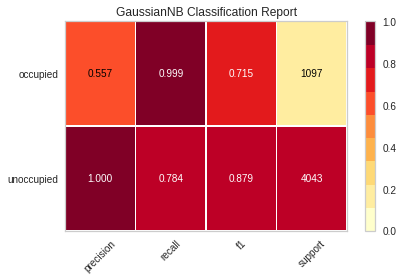

In [3]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import classification_report

# Load the classification data set
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = classification_report(
    GaussianNB(), X_train, y_train, X_test, y_test, classes=classes, support=True
);

# 2 混淆矩阵Confusion Matrix
ConfusionMatrix visualizer是一个ScoreVisualizer，它使用一个合适的scikit学习分类器和一组测试X和y值，并返回一个报告，显示每个测试值预测类与实际类的比较情况。数据科学家使用混淆矩阵来理解哪些类最容易混淆。它们提供的信息与分类报告中提供的信息相似，但它们提供了对单个数据点分类的更深入的了解，而不是顶级分数。

下面是一些使用ConfusionMatrix可视化工具的示例；更多信息可以通过查看[scikit learn文档](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)来找到。

|可视化器|ConfusionMatrix|
|-|-|
|快速使用方法|confusion_matrix()|
|模型|分类|
|工作流程|模型评估|

## 2.1 基础使用

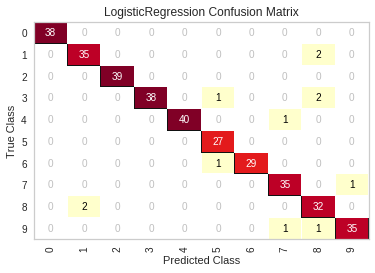

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
#我们将使用scikit learn中的手写数字数据集。
#该数据集的每个特征都是手写数字的8x8像素图像。
# Digits.data 将这64个像素转换为一个维度数组
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)
X_test.shape,y_test.shape
model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
# 混淆矩阵分类号
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
#为了创建ConfusionMatrix，我们需要一些测试数据。对数据执行Score runs predict（）然后从scikit learn创建混淆矩阵。
cm.score(X_test, y_test)

# 图中显示的每一类的个数
cm.show();

## 2.2 用类名绘图
可以使用label_encoder参数将类名添加到ConfusionMatrix图中。label_编码器可以是sklearn.preprocessing.LabelEncoder（或具有执行映射的反_变换方法的任何对象）或具有编码到字符串映射的dict，如下面的示例所示：

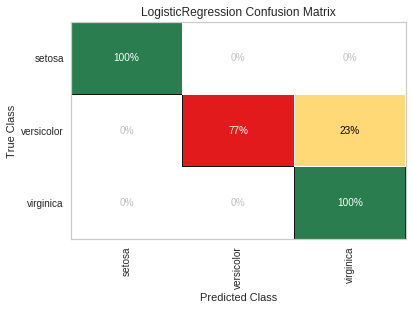

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# percent表示显示百分比
iris_cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'},percent =True
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.show();

## 2.3 快速方法
上面的相同功能可以通过关联的快速方法来实现confusion_matrix。此方法将ConfusionMatrix使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。在下面的示例中，我们可以看到如何LogisticRegression有效地对信用数据集建模（提示：请Rank2D检查多重共线性！）。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


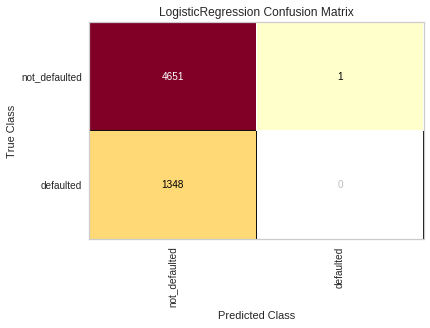

In [6]:
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
);

# 3 ROCAUC
ROCAUC(接受者操作特征/曲线下的面积)图允许用户可视化分类器的敏感性和特异性之间的权衡。接收器工作特性(ROC)是分类器预测质量的度量，它比较和可视化模型的灵敏度和特异度之间的权衡。
绘制ROC曲线时，ROC曲线在Y轴上显示真标签的阳性率，在X轴上显示假标签的阳性率，同时显示全局平均和每个类别的假阳性率。
因此，理想点是图的左上角：假阳性为0，真阳性为1。

这就引出了另一个度量，曲线下面积(AUC)，它是假阳性和真阳性之间关系的计算。AUC越高，模型通常越好。然而，检查曲线的“陡度”也很重要，因为这描述了真实阳性率的最大化，同时使假阳性率最小化。

关于ROC和AUC可以查看[https://segmentfault.com/a/1190000016686335](https://segmentfault.com/a/1190000016686335)

|可视化器|ROCAUC|
|-|-|
|快速使用方法|roc_auc()|
|模型|分类|
|工作流程|模型评估|


## 3.1 基本使用

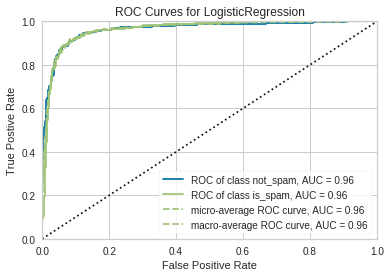

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

# Load the classification dataset
X, y = load_spam()

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate the visualizer with the classification model
# 初始分类器
model = LogisticRegression(multi_class="auto", solver="liblinear")
# 绘制ROCAUC
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

## 3.2 多类别ROCAUC曲线
Yellowbrick的ROCAUC可视化工具允许绘制多类分类曲线。ROC曲线通常用于二值分类，而事实上Scikit-Learn roc_curve度量仅能对二值分类器进行度量。Yellowbrick通过对输出进行二进制化(每个类)或使用one vs-rest(micro score)或one vs-all(macro score)分类策略来解决这个问题。关于one vs-rest(micro score)或one vs-all(macro score)解释见[https://blog.csdn.net/u010551621/article/details/46907575](https://blog.csdn.net/u010551621/article/details/469075750)

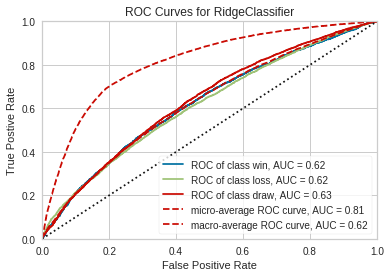

In [8]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
X, y = load_game()

# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instaniate the classification model and visualizer
model = RidgeClassifier()
# 多类
visualizer = ROCAUC(model, classes=["win", "loss", "draw"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();            # Finalize and render the figure

默认情况下，在使用多类ROCAUC可视化工具时，除了每个类的微观和宏观平均曲线外，还绘制了每个类的曲线。这使用户可以按类别检查敏感性和特异性之间的权衡。请注意，对于multi-class ROCAUC，必须至少将micro，macro或per_class参数之一设置为True（默认情况下，所有参数都设置为True）。

## 3.3 快速方法
上面的相同功能可以通过关联的快速方法来实现roc_auc。此方法将ROCAUC使用关联的参数构建对象，将其拟合，然后（可选）立即显示它

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


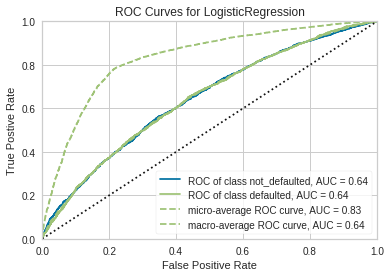

In [9]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model = LogisticRegression()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['not_defaulted', 'defaulted']);

# 4 Precision-Recall曲线

精确召回曲线是用来评估分类器质量的指标，特别是在分类非常不平衡的情况下。
精度-召回曲线显示了精度(衡量结果相关性)和召回率(衡量返回多少相关结果)之间的权衡。
曲线下面的大区域代表高-召回率和精确度，这是分类器的最佳情况，显示了为其选择的大多数类别返回准确结果的模型。
关于 Precision-Recall具体可以参考[https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html]( https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

|可视化器|PrecisionRecallCurve|
|-|-|
|快速使用方法|precision_recall_curve()|
|模型|分类|
|工作流程|模型评估|


## 4.1 二分类


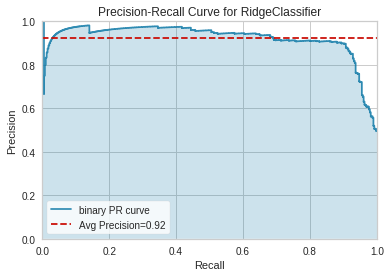

In [10]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_spam

# Load the dataset and split into train/test splits
X, y = load_spam()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

精确召回曲线的基本情况是二进制分类情况，这种情况也是最直观的解释。在上图中，我们可以看到y轴上的精度相对于x轴上的召回率。填充区域越大，分类器越强。红线表示平均精度，它是整个图的汇总，计算为在每个阈值处获得的精度的加权平均值，因此权重是与前一个阈值的召回率之差。

## 4.2 多标签分类
为了支持多标签分类，将估计器包装在OneVsRestClassifier中，以针对每个类生成二进制比较（例如，正例是该类，而负例是任何其他类）。然后，将Precision-Recall曲线计算为所有类别的精度和召回率的平均值：

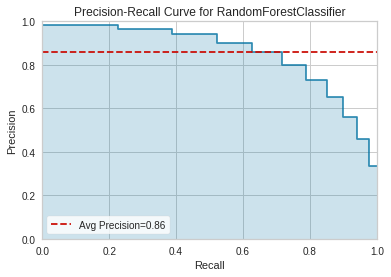

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

# Load dataset and encode categorical variables
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RandomForestClassifier(n_estimators=10))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

然而，可以计算出更复杂的精确召回曲线，单独显示每条曲线以及F1分数等参曲线（例如，显示不同F1分数的精确度和召回率之间的关系）。

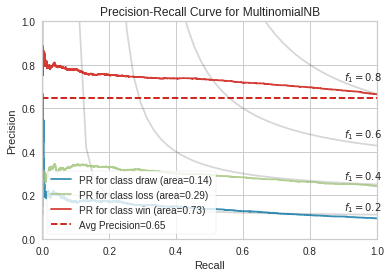

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

# Load dataset and encode categorical variables
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 4.3 快速方法
使用关联的快速方法，可以在一行中实现与上述类似的功能precision_recall_curve。此方法将实例化PrecisionRecallCurve可视化程序并将其适合于训练数据，然后将其在可选提供的测试数据（或未提供的训练数据）上评分。

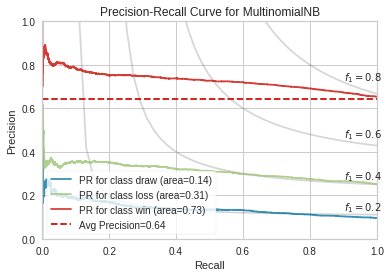

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

# Load dataset and encode categorical variables
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# 5 类平衡
分类模型面临的最大挑战之一是训练数据中类的不平衡。
严重的类别失衡可能会被相对较好的F1和准确性分数所掩盖-分类器只是猜测多数类别，而不对代表不足的类别进行任何评估。有几种处理类不平衡的技术，如分层抽样、对多数类进行下采样、加权等。但是在采取这些操作之前，了解训练数据中的类平衡是很重要的。
ClassBalance可视化工具通过创建每个类的支持条形图(即类在数据集中的表示频率)来支持这一点。



|可视化器|ClassBalance|
|-|-|
|快速使用方法|class_balance()|
|模型|分类|
|工作流程|特征分析，目标分析，模型选择|

## 5.1 基本使用

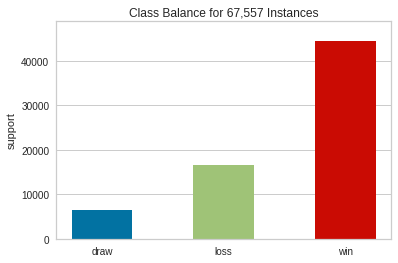

In [14]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

由此得到的数字使我们能够诊断平衡问题的严重性。在这个图中，我们可以看到“赢”类在其他两个类中占主导地位。一个潜在的解决方案可能是创建一个二进制分类器：“win”vs“not win”，并将“loss”和“draw”类组合成一个类。

如果在评估过程中必须保持班级不平衡（例如，被分类的事件实际上与频率所暗示的一样罕见），则应使用分层抽样来创建训练和测试拆分。 这样可以确保测试数据的类别与培训数据的比例大致相同。 虽然scikit-learn默认在train_test_split和其他cv方法中执行此操作，但比较两个拆分中每个类的支持可能很有用。

ClassBalance可视化器具有“比较”模式，可以将训练和测试数据传递到fit（），从而创建并排的条形图，而不是单个条形图，如下所示：

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:752: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


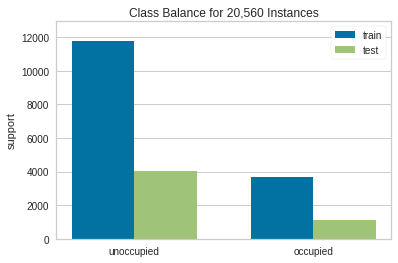

In [15]:
from sklearn.model_selection import TimeSeriesSplit

from yellowbrick.datasets import load_occupancy
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_occupancy()

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show(); 

该可视化使我们能够进行快速检查，以确保两个拆分中每个类的比例大致相似。这种可视化应该是第一站，尤其是当评估指标在不同拆分之间变化很大时。

## 5.2 快速方法
上面的相同功能可以通过关联的快速方法class_balance来实现。此方法将ClassBalance使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。

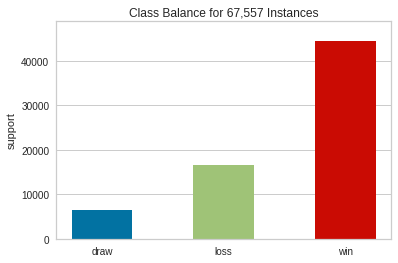

In [16]:
from yellowbrick.datasets import load_game
from yellowbrick.target import class_balance

# Load the dataset
X, y = load_game()

# Use the quick method and immediately show the figure
class_balance(y);

# 6 类预测错误
Yellowbrick的ClassPredictionError图是对其他分类模型诊断工具(比如混淆矩阵和分类报告)的扭曲。与分类报告一样，这个图以堆叠条形图的形式显示了拟合分类模型中每个类的支持度(训练样本的数量)。每个条被分割以显示每个类的预测比例(包括假阴性和假阳性，如混淆矩阵)。您可以使用ClassPredictionError来可视化您的分类器遇到了哪些特别困难的类，更重要的是，在每个类的基础上它给出了哪些不正确的答案。这通常可以使您更好地理解不同模型的优缺点以及数据集特有的特殊挑战。
类预测误差图提供了一种快速了解分类器预测正确类的能力的方法。

|可视化器|ClassPredictionError|
|-|-|
|快速使用方法|class_prediction_error()|
|模型|分类|
|工作流程|模型评估|

## 6.1 基础使用

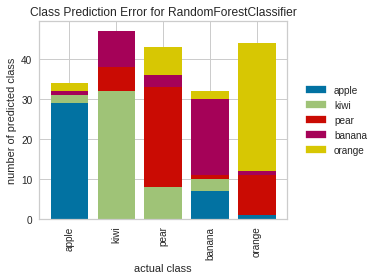

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError


# Create classification dataset
X, y = make_classification(
    n_samples=1000, n_classes=5, n_informative=3, n_clusters_per_class=1,
    random_state=36,
)

classes = ["apple", "kiwi", "pear", "banana", "orange"]

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

在上面的例子中，虽然RandomForestClassifier似乎很擅长根据水果的特征正确地预测苹果，但它经常错误地将梨标记为猕猴桃，而将猕猴桃错误地标记为香蕉。

相比之下，在下面的例子中，RandomForestClassifier在正确预测默认情况下的账户方面做得很好，但在预测账户持有人是否保持了账单的流动方面，就有点像抛硬币一样困难。

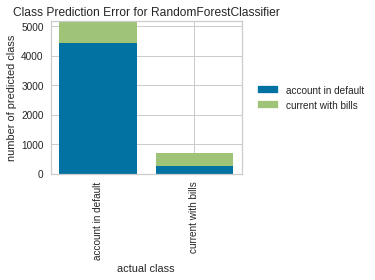

In [18]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_credit

X, y = load_credit()

classes = ['account in default', 'current with bills']

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

## 6.2 快速方法
使用关联的快速方法，可以在一行中实现与上述类似的功能class_prediction_error。此方法将实例化ClassPredictionError可视化程序并将其适合于训练数据，然后将其在可选提供的测试数据（或未提供的训练数据）上评分。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


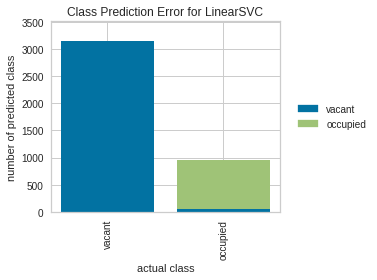

In [19]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import class_prediction_error
from yellowbrick.datasets import load_occupancy

# Load the dataset and split into train/test splits
X, y = load_occupancy()
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True
)

class_prediction_error(
    LinearSVC(random_state=42),
    X_train, y_train, X_test, y_test,
    classes=["vacant", "occupied"]
);

# 7 辨别阈值
相对于二分类器的识别阈值，对精度、召回率、f1得分和队列率进行可视化。辨别阈值是选择正类而不是负类的概率或得分。通常，这个值设置为50%，但是可以调整阈值，以增加或减少对误报或其他应用因素的敏感性。(该可视化工具仅适用于二进制分类。)

|可视化器|discriminationThreshold|
|-|-|
|快速使用方法|discrimination_threshold()|
|模型|分类|
|工作流程|模型评估|

## 7.1 判别阈值

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


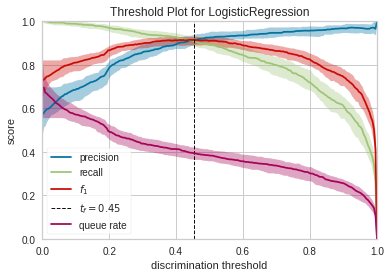

In [20]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

# Load a binary classification dataset
X, y = load_spam()

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

二进制分类算法的一种常见用法是使用它们产生的分数或概率来确定需要特殊处理的案例。例如，防欺诈应用程序可能使用分类算法来确定交易是否可能是欺诈性的，是否需要详细调查。在上图中，我们提供了一个示例，其中二进制分类器确定电子邮件是“垃圾邮件”（肯定的情况）还是“非垃圾邮件”（否定的情况）。被检测为垃圾邮件的电子邮件将移至隐藏文件夹，并最终被删除。

许多分类器使用Decision_function对阳性分类评分，或使用predict_proba函数计算阳性分类的概率。 如果分数或概率大于某个判别阈值，则选择肯定类别，否则选择否定类别。

一般来说，阈值在案例之间是平衡的，并设置为0.5或50%的概率。但是，这个阈值可能不是最优阈值:对于一个辨别阈值，精度和召回率之间通常存在反向关系。通过调整分类器的阈值，可以将F1得分(精度和召回率的调和平均值)调整为可能的最佳匹配，或者调整分类器以使其行为最适合特定应用程序。分类器是通过考虑以下指标来调整的:
+ 精度：精度的提高降低了误报的数量;当特殊处理的成本很高(例如，在防止欺诈或丢失重要电子邮件上浪费时间)时，应该优化这个度量。
+ 召回率：召回率的增加降低漏掉阳性类别的可能性；在至关重要的情况下，即使以更多的误报为代价，也应该优化此指标。
+ F1得分：F1得分为precision和recall之间的调和平均值。fbeta参数确定计算此度量时精度和召回率的相对权重，默认设置为1或F1。优化此度量可以在精确度和召回率之间取得最佳平衡。
+ 排队率：“队列”是垃圾邮件文件夹或欺诈调查台的收件箱。 该指标描述了必须检查的实例的百分比。 如果审核的成本很高（例如预防欺诈），则必须在业务需求方面将其降至最低； 如果没有（例如垃圾邮件过滤器），则可以对其进行优化以确保收件箱保持整洁。

在上图中，我们看到可视化器已调整为寻找最佳F1分数，该分数标注为阈值0.43。 为了考虑模型相对于度量的变化（显示为中值曲线周围的填充区域），模型在多个训练/测试拆分中多次运行。

## 7.2 快速方法
上面的相同功能可以通过关联的快速方法来实现discrimination_threshold。此方法将DiscriminationThreshold使用关联的参数构建对象，将其拟合，然后（可选）立即显示它.

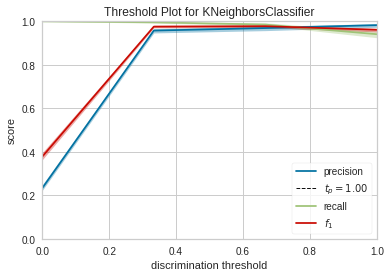

In [21]:
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.datasets import load_occupancy
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Load the classification dataset
X, y = load_occupancy()

# Instantiate the visualizer with the classification model
model = KNeighborsClassifier(3)

# exclude设定不显示的指标
# argmax阈值评价的指标，可选'precision','recall','fscore',None,默认'f1score'
discrimination_threshold(model, X, y,exclude='queue_rate', argmax='precision');

# 8 参考
[https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html](https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html)

[https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)

[https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html](https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html)

[https://www.scikit-yb.org/en/latest/api/classifier/prcurve.html](https://www.scikit-yb.org/en/latest/api/classifier/prcurve.html)

[https://www.scikit-yb.org/en/latest/api/target/class_balance.html](https://www.scikit-yb.org/en/latest/api/target/class_balance.html)

[https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html](https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html)

[https://www.scikit-yb.org/en/latest/api/classifier/threshold.html](https://www.scikit-yb.org/en/latest/api/classifier/threshold.html)